In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import layers

import numpy as np
np.set_printoptions(precision=5)
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
import scipy as sp
from scipy import stats
import sklearn

from scipy.stats import norm
import matplotlib.mlab as mlab

#from statsmodels.stats.diagnostic import lilliefors
#import statsmodels.api as sm 
from scipy.stats import chisquare

import pingouin as pg

from sklearn.preprocessing import PowerTransformer
import scipy.stats

import statsmodels.stats.weightstats as wstats

import time

/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
CSN_path = './Data/'


def load_CSN_data():
    csv_path = CSN_path + "Master_List_LCPLCP.csv"
    return pd.read_csv(csv_path)

CSN = load_CSN_data()

CSN_new_err = CSN['Error'][-18:]

CSN = CSN.drop(['Example ID', 'Source', 'Figure ID', 'Data Provider', 'PI',
       'Date Received', 'Data Measurment Published', 'Prior Exposure', 'Comments', 'Error'], axis=1)

#tsize = CSN.shape[0]//10

CSN_new = pd.get_dummies(CSN)


CSN_new['Surface Area per Liter'] = CSN_new['Surface Area (NMC) (m2/g)'] * CSN_new['Concentration (mg/L)']
CSN_new = CSN_new.drop(['Surface Area (NMC) (m2/g)'], axis=1)

CSN_new['log Concentration'] = np.log10(CSN_new['Concentration (mg/L)'] + 1e-9)
CSN_new = CSN_new.drop(['Concentration (mg/L)'], axis=1)

#CSN_hold = sklearn.utils.shuffle(CSN_new, random_state=65788)
CSN_new = CSN_new[-18:]
#CSN_test = CSN_hold[-tsize:]

In [3]:
out = np.load('Data/true_test_L.pkl', allow_pickle=True)

/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


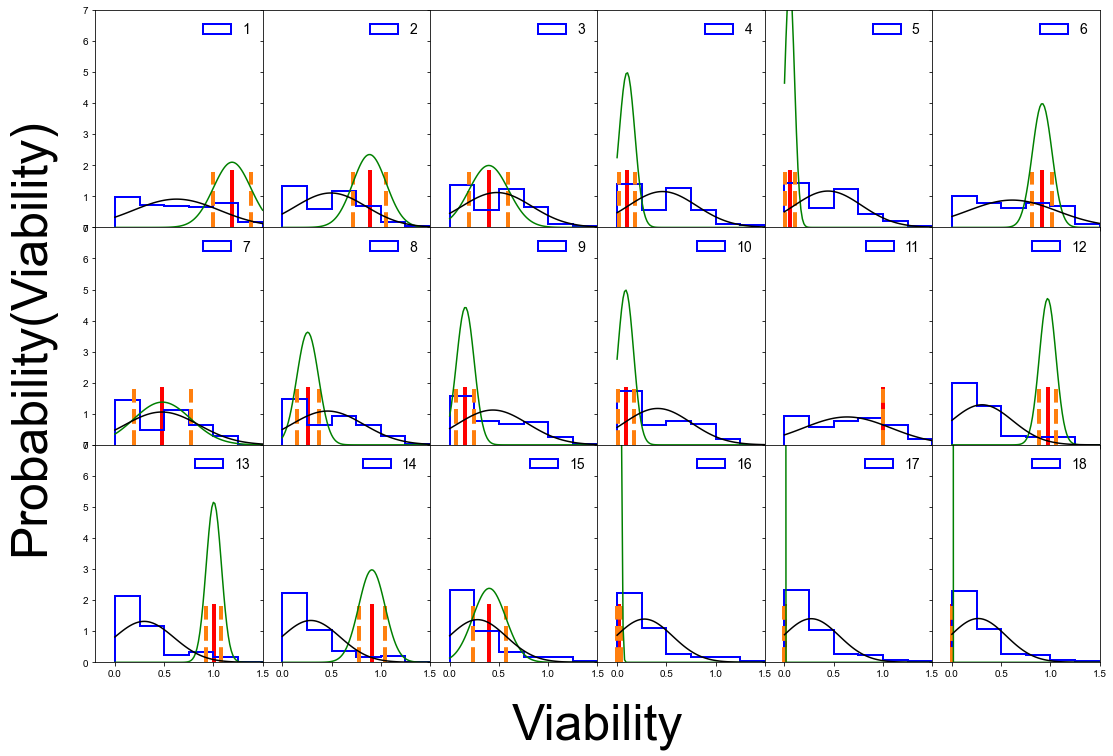

In [6]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 100 1-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 0, 0, i])
    variance= np.var(out[:, 0, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    #percent = (Diff/x2)*100
    #print(percent)
    #print (Diff)
    
    #U = stats.kstest((out[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 0, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 0, 0, i])
    #print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 1.5])
    axes[i].hist(out[:, 0, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
    
#plt.show()
#plt.savefig('A_100_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

NormaltestResult(statistic=13.153603212399194, pvalue=0.0013922952896474404)
NormaltestResult(statistic=2.485181860638919, pvalue=0.28863541406304044)
NormaltestResult(statistic=2.036923216740219, pvalue=0.361150103330509)
NormaltestResult(statistic=2.89888564520955, pvalue=0.2347010217734583)
NormaltestResult(statistic=4.714077196377818, pvalue=0.09470025385327344)
NormaltestResult(statistic=2.1847581955546325, pvalue=0.33541755255026434)
NormaltestResult(statistic=3.5923297368160476, pvalue=0.16593404839283618)
NormaltestResult(statistic=8.428072660420339, pvalue=0.014786564268732197)
NormaltestResult(statistic=16.7572799863038, pvalue=0.00022972215680900024)
NormaltestResult(statistic=21.268711720191877, pvalue=2.4074536324398467e-05)
NormaltestResult(statistic=2.680542151989104, pvalue=0.2617746981249244)
NormaltestResult(statistic=22.145538404049546, pvalue=1.5529498680728042e-05)
NormaltestResult(statistic=23.488927270453214, pvalue=7.933124139869711e-06)
NormaltestResult(statist

/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


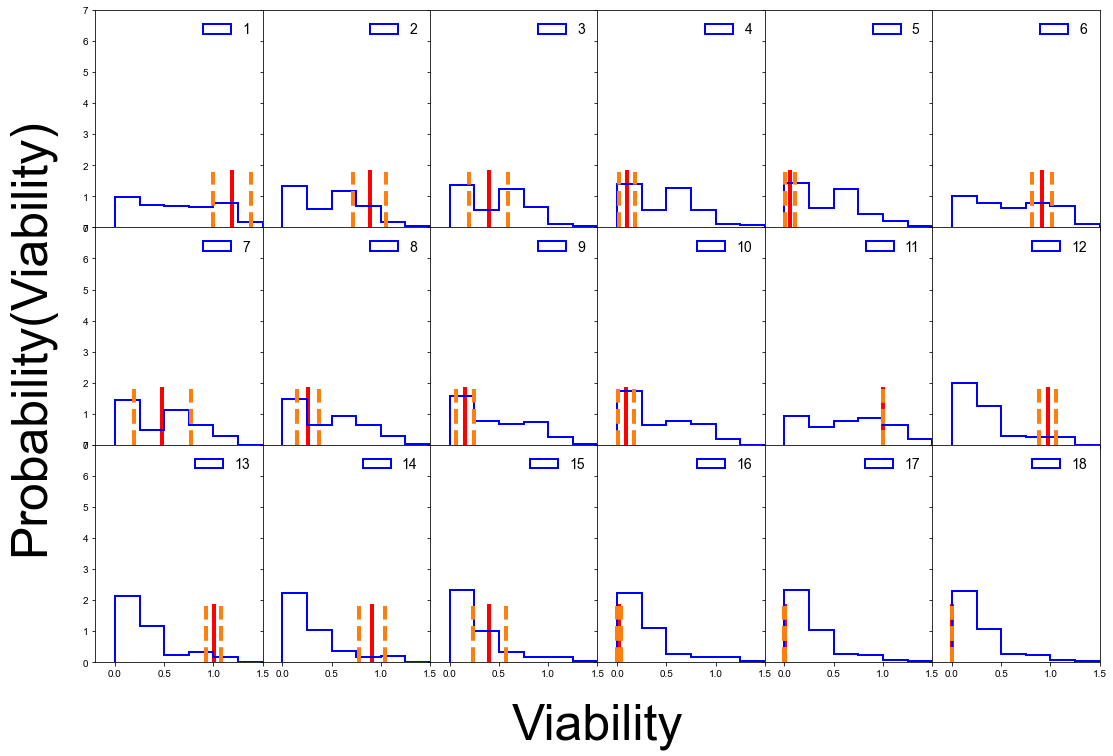

In [7]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 100 1-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 0, 0, i])
    variance= np.var(out[:, 0, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    #percent = (Diff/x2)*100
    #print(percent)
    #print (Diff)
    
    #U = stats.kstest((out[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 0, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 0, 0, i])
    print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 1.5])
    axes[i].hist(out[:, 0, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
    
#plt.show()
#plt.savefig('A_100_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [8]:
   a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out[:, 0, 0, i])
            b_list.append(M)

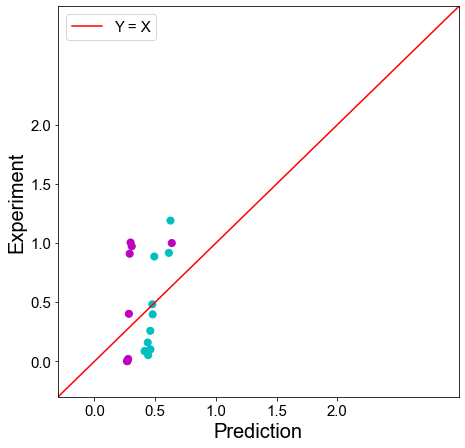

In [9]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

NormaltestResult(statistic=1.8381909704694528, pvalue=0.3988796705141524)
NormaltestResult(statistic=2.5166822742753543, pvalue=0.2841249601292395)
NormaltestResult(statistic=1.8598408627743277, pvalue=0.3945851057120501)
NormaltestResult(statistic=0.8016650829550763, pvalue=0.6697622090375297)
NormaltestResult(statistic=0.9118785452586033, pvalue=0.6338523281151055)
NormaltestResult(statistic=0.18576011286562927, pvalue=0.9113027986496484)
NormaltestResult(statistic=1.0817463954695128, pvalue=0.582239620020711)
NormaltestResult(statistic=1.4269106846036452, pvalue=0.4899483300565246)
NormaltestResult(statistic=2.7620535594457385, pvalue=0.2513203698740789)
NormaltestResult(statistic=4.500459283129558, pvalue=0.10537502329792386)
NormaltestResult(statistic=0.29920133857958936, pvalue=0.8610517521881044)
NormaltestResult(statistic=4.340613508521557, pvalue=0.11414259781176711)
NormaltestResult(statistic=4.765918072200127, pvalue=0.09227712179260782)
NormaltestResult(statistic=5.41970016

/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


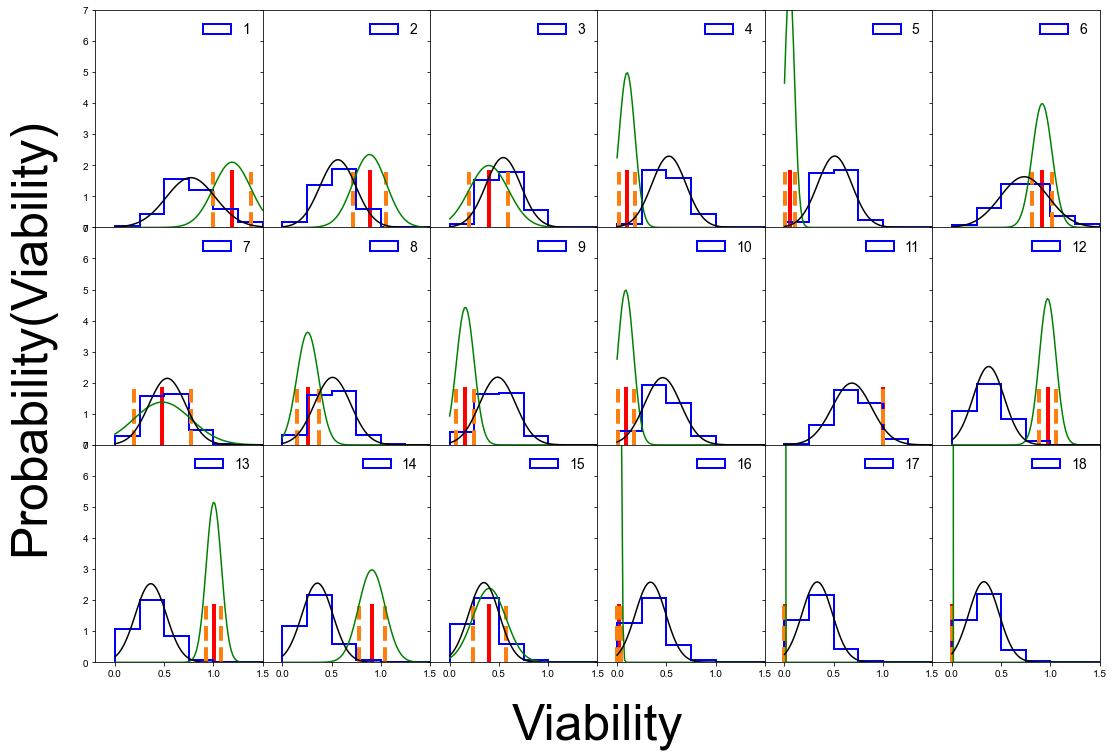

In [10]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 100 4-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 1, 0, i])
    variance= np.var(out[:, 1, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    #percent = (Diff/x2)*100
    #print(percent)
    #print (Diff)
    
    #U = stats.kstest((out[:, 1, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 1, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 1, 0, i])
    print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 1, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 1.5])
    axes[i].hist(out[:, 1, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
#plt.show()
#plt.savefig('B_100_4.pdf', transparent=True, format='pdf', bbox_inches='tight')

0.41940717703570385
0.3212628011458867
0.14724448868670126
0.4252065998175871
0.4579428294821692
0.1817136309550914
0.049899962924889685
0.2524904257807874
0.32756002027674624
0.3759034130703781
0.31598684553023526
0.5992873436569301
0.6396966371111106
0.5536075443505122
0.054497889043151004
0.3198885926876467
0.3302229105811135
0.3236161037083241


/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


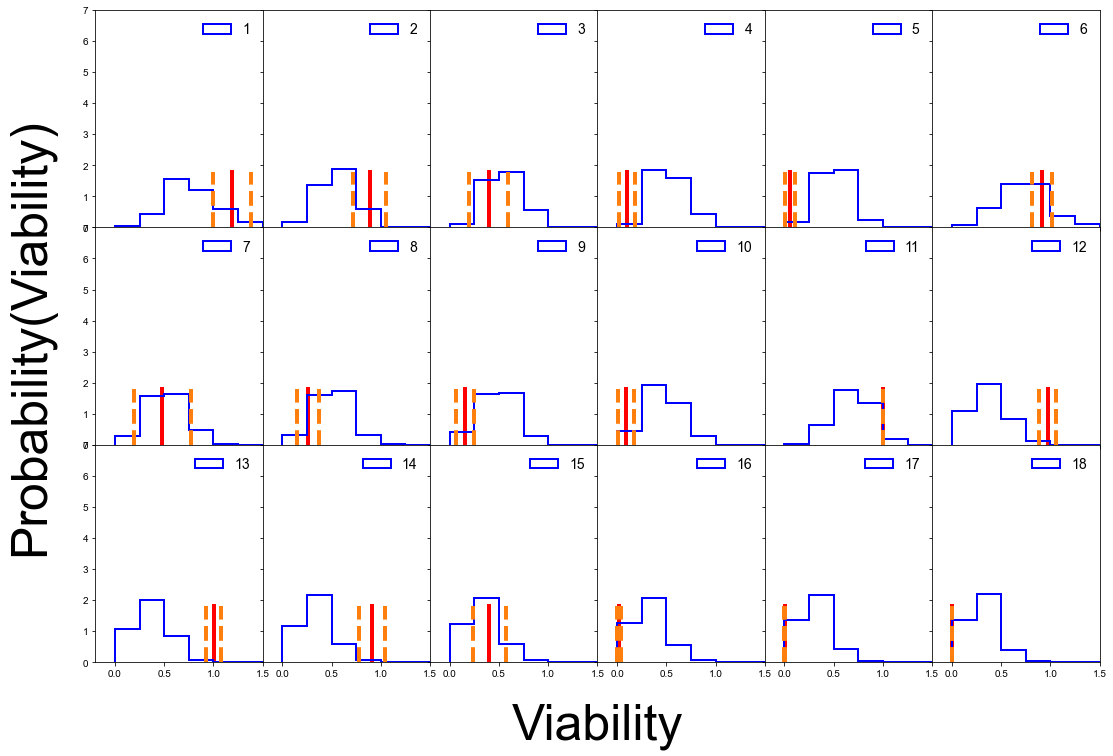

In [11]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 100 4-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 1, 0, i])
    variance= np.var(out[:, 1, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    #percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out[:, 1, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 1, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 1, 0, i])
    #print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 1, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 1.5])
    axes[i].hist(out[:, 1, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
#plt.show()
#plt.savefig('B_100_4.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [12]:
   a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out[:, 1, 0, i])
            b_list.append(M)

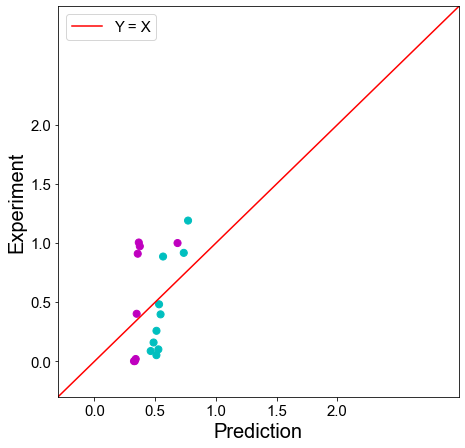

In [13]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

NormaltestResult(statistic=0.5431086932571758, pvalue=0.7621938596758238)
NormaltestResult(statistic=0.5612776695811178, pvalue=0.7553010746961188)
NormaltestResult(statistic=1.5378786802669289, pvalue=0.46350442822727367)
NormaltestResult(statistic=1.3801940700905835, pvalue=0.50152740097077)
NormaltestResult(statistic=0.8750783006038799, pvalue=0.6456232495879364)
NormaltestResult(statistic=1.1112132778579138, pvalue=0.5737241122257961)
NormaltestResult(statistic=1.0087720910027578, pvalue=0.6038762141560321)
NormaltestResult(statistic=1.2001561108478056, pvalue=0.5487688000409432)
NormaltestResult(statistic=2.23623925761356, pvalue=0.32689389894086696)
NormaltestResult(statistic=3.461445395488716, pvalue=0.17715633321264895)
NormaltestResult(statistic=3.3721832344995253, pvalue=0.18524210806539104)
NormaltestResult(statistic=1.144886461430102, pvalue=0.5641454161208289)
NormaltestResult(statistic=1.171373513063881, pvalue=0.5567233970677049)
NormaltestResult(statistic=1.328608447265

/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


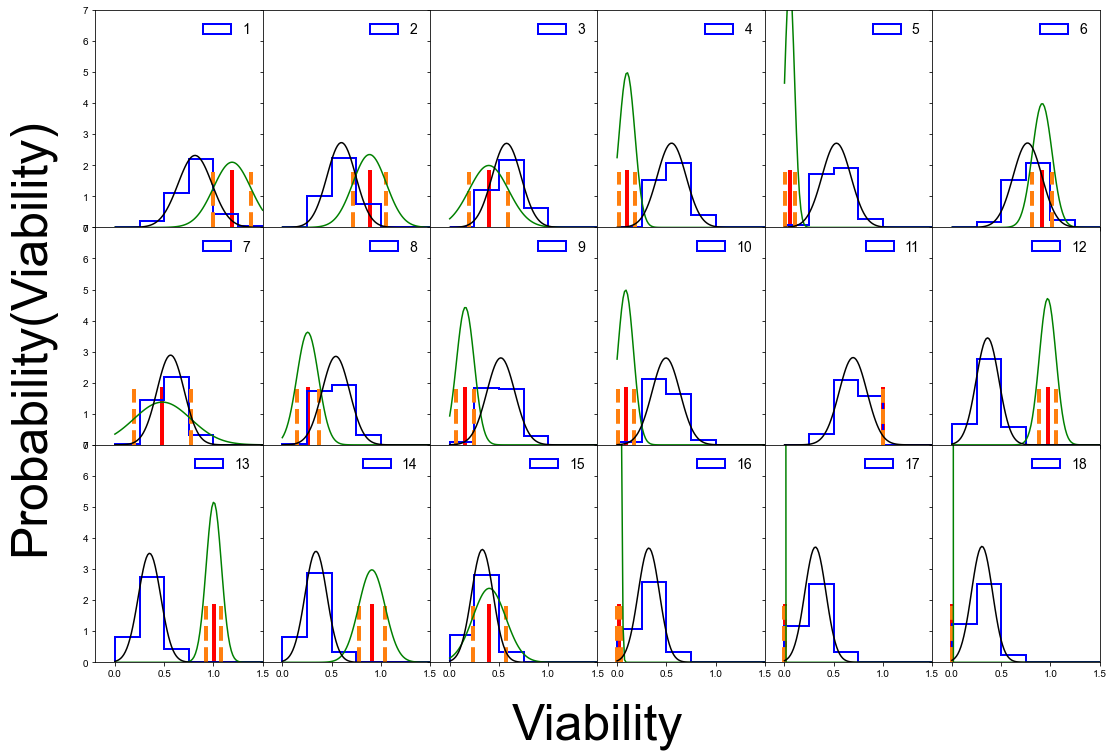

In [14]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 100 7-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 2, 0, i])
    variance= np.var(out[:, 2, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    percent = (Diff/x2)*100
    #print(percent)
    #print (Diff)
    
    #U = stats.kstest((out[:, 2, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 2, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 2, 0, i])
    print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 2, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 1.5])
    axes[i].hist(out[:, 2, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
#plt.show()
#plt.savefig('C_100_7.pdf', transparent=True, format='pdf', bbox_inches='tight')

0.37627523477418456
0.28563927102213715
0.18074592512644294
0.45258503340998124
0.475639851207375
0.1490548716832225
0.08352438007965762
0.28564979195735485
0.36035833975012443
0.4095757658758251
0.30338954975872
0.6103717432325999
0.6527462230466036
0.5679642589188163
0.0704308145369743
0.3023066071913856
0.31168346810855513
0.304093040343023


/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


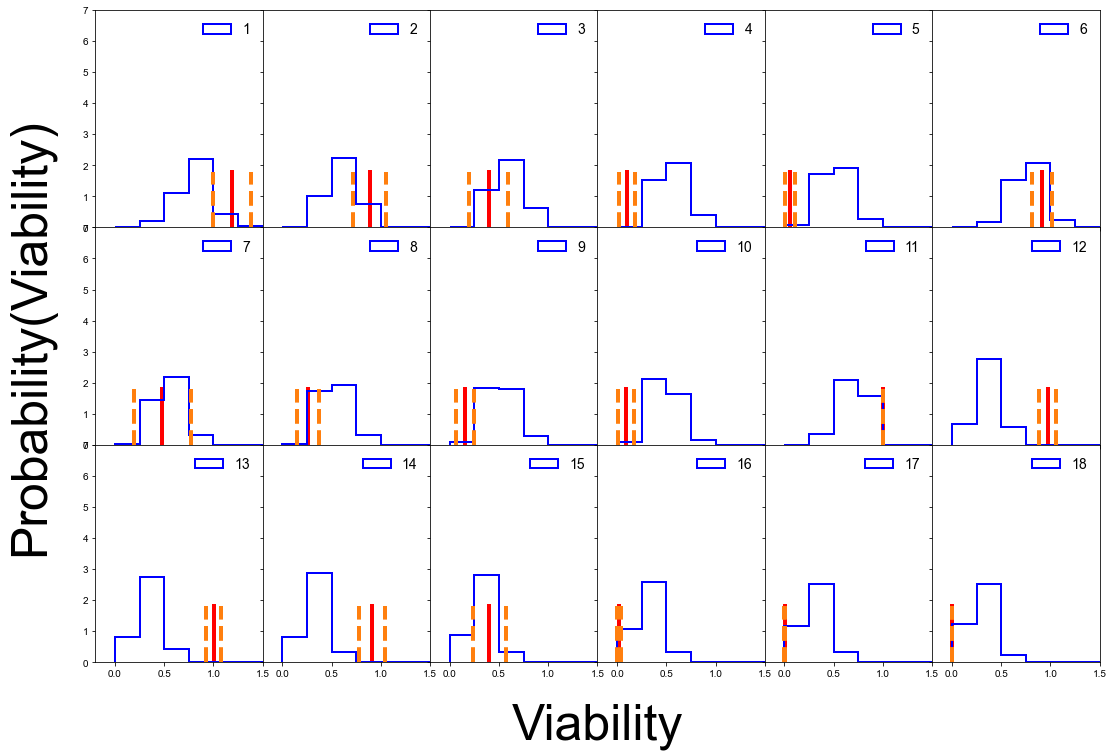

In [15]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 100 7-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 2, 0, i])
    variance= np.var(out[:, 2, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out[:, 2, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 2, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 2, 0, i])
    #print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 2, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 1.5])
    axes[i].hist(out[:, 2, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
#plt.show()
#plt.savefig('C_100_7.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [16]:
   a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out[:, 2, 0, i])
            b_list.append(M)

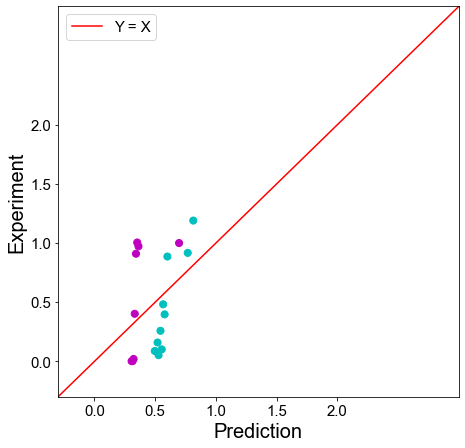

In [17]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

NormaltestResult(statistic=2.631636421799815, pvalue=0.26825474446474035)
NormaltestResult(statistic=2.185909142877152, pvalue=0.3352245841126995)
NormaltestResult(statistic=2.281355454891824, pvalue=0.31960234511965996)
NormaltestResult(statistic=2.6195953852454448, pvalue=0.26987464849463816)
NormaltestResult(statistic=3.890548790716928, pvalue=0.14294799369015207)
NormaltestResult(statistic=5.331093531123273, pvalue=0.06956130940520215)
NormaltestResult(statistic=1.6877870728067788, pvalue=0.430032910832571)
NormaltestResult(statistic=1.937992670606336, pvalue=0.37946370136309376)
NormaltestResult(statistic=1.8771620587543518, pvalue=0.3911825182276302)
NormaltestResult(statistic=1.4209377427658634, pvalue=0.49141373359936813)
NormaltestResult(statistic=1.3784266728780838, pvalue=0.501970795920899)
NormaltestResult(statistic=0.3220046235454738, pvalue=0.8512901031156248)
NormaltestResult(statistic=0.46832678788340326, pvalue=0.7912325227323199)
NormaltestResult(statistic=0.525837121

/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


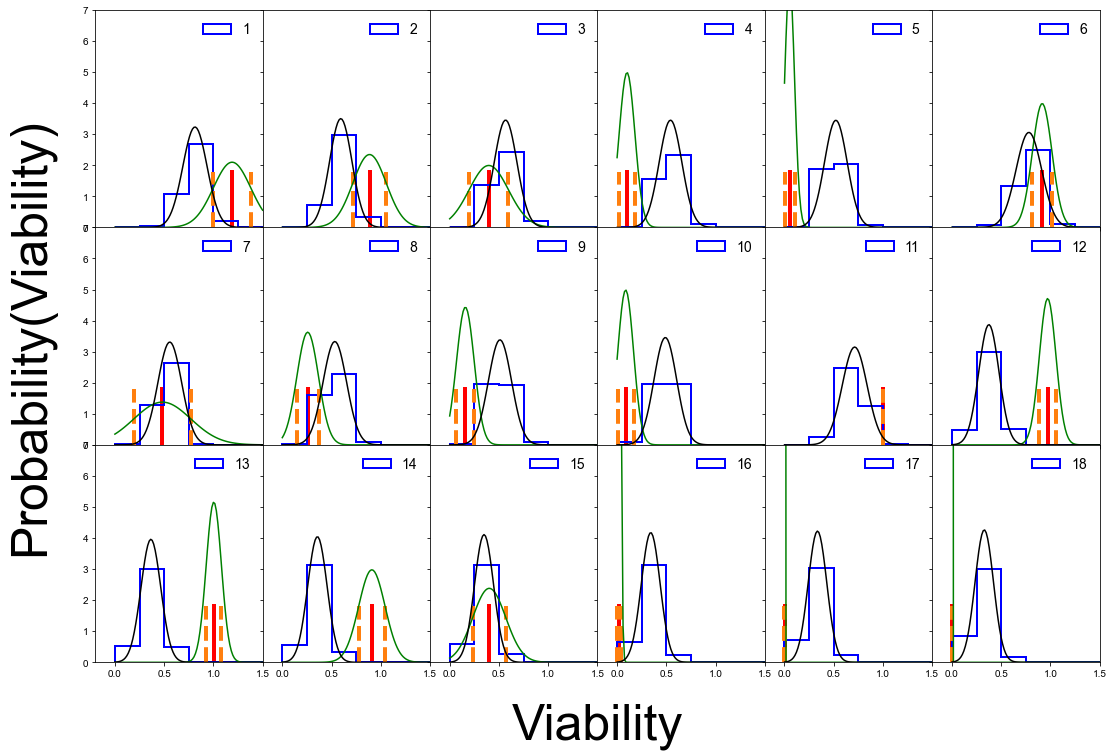

In [18]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 100 10-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 3, 0, i])
    variance= np.var(out[:, 3, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    percent = (Diff/x2)*100
    #print(percent)
    #print (Diff)
    
    #U = stats.kstest((out[:, 3, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 3, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 3, 0, i])
    print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 3, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 1.5])
    axes[i].hist(out[:, 3, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
#plt.show()
#plt.savefig('D_100_10.pdf', transparent=True, format='pdf', bbox_inches='tight')

0.37689105813266266
0.29209571130709766
0.17066504423147
0.44150653425044395
0.4695114686376867
0.13530960842952322
0.07534852923561647
0.27541789262448624
0.3515143237494701
0.4027982727291811
0.2873528246745326
0.5970409911368924
0.6390322088459458
0.553241013775656
0.05312246343728044
0.32195811798645985
0.3332311867651486
0.32716235517910236


/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


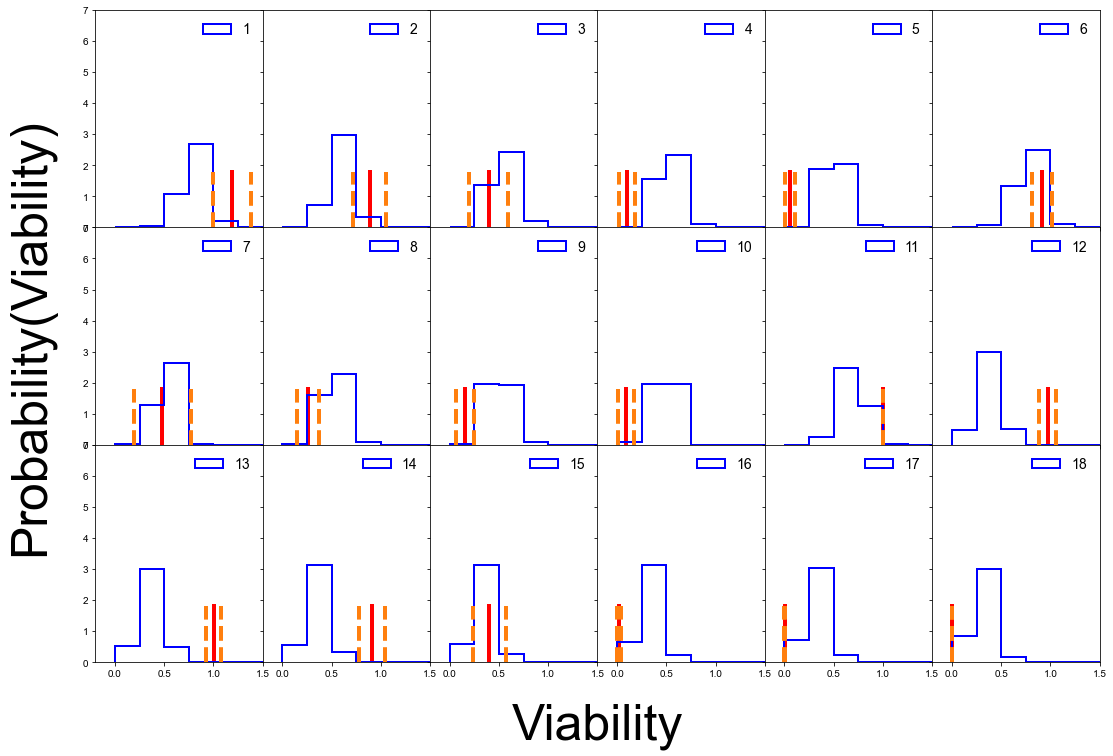

In [19]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 100 10-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 3, 0, i])
    variance= np.var(out[:, 3, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out[:, 3, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 3, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 3, 0, i])
    #print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 3, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 1.5])
    axes[i].hist(out[:, 3, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
#plt.show()
#plt.savefig('D_100_10.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [20]:
   a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out[:, 3, 0, i])
            b_list.append(M)

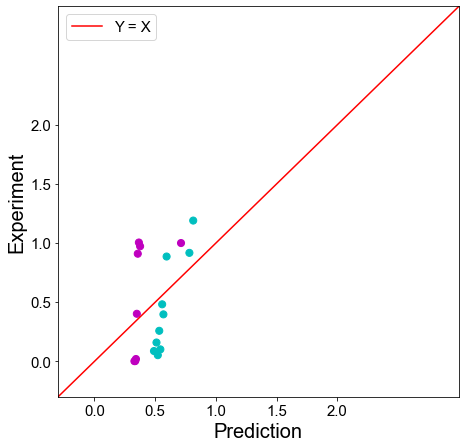

In [21]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()